# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [147]:
# Load data
df = pd.read_csv('../Week-02-EDA/data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [148]:
# 1. Print the number of duplicate rows we have in our dataframe.
num = df.duplicated().sum()
print('Number of Duplicates: ', num)



Number of Duplicates:  720


In [149]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()


In [150]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

numd = df.duplicated().sum()
print('Remaining Duplicates: ', numd)

Remaining Duplicates:  0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [151]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()



Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [152]:
# * Print how long our dataframe is.

print("Length = ", df.Year.count())

Length =  11194


In [153]:
# * Remove any row that has a null value in it. 
df = df.dropna()


In [154]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print("New Length = ", df.Year.count())


New Length =  11092


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<AxesSubplot:xlabel='Make'>

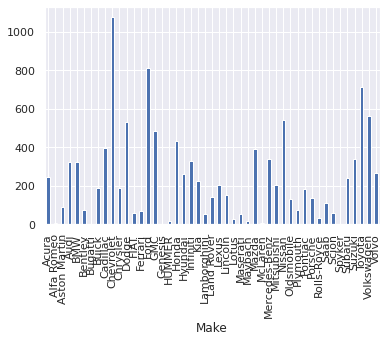

In [155]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
df.groupby('Make')['Make'].count().plot(kind = 'bar')



<AxesSubplot:ylabel='Make'>

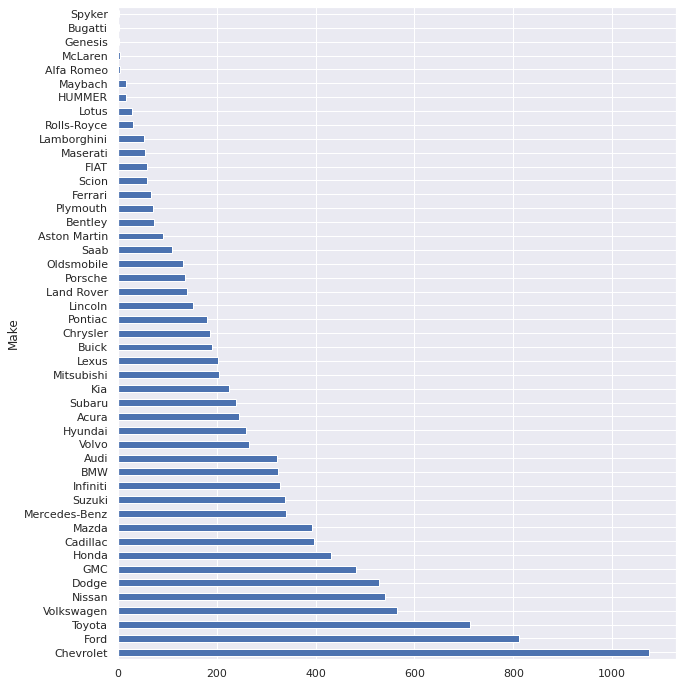

In [156]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

df.groupby('Make')['Make'].count().sort_values(ascending=False).plot.barh(figsize =(10,12))


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:xlabel='Year'>

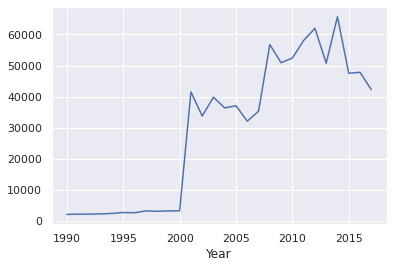

In [157]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
df.groupby('Year').MSRP.mean().plot()

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [158]:
# Make a column where is 10 when year is less than 2000, else 1.
df['adjusted_price'] = np.where(df['Year']<=2000,10,1)
# Multiply the MSRP by the price adjuster.
df['adjusted_price']=df['MSRP']*df['adjusted_price']




# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<AxesSubplot:xlabel='Year'>

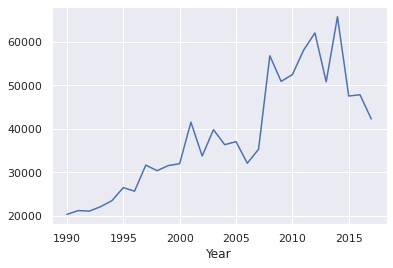

In [159]:
# Plot new prices

df.groupby('Year').adjusted_price.mean().plot()

# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [160]:
# What are the top 5 car makers make the most expensive cars on average. 

df.groupby('Make')['adjusted_price'].mean().sort_values(ascending=False).head()


Make
Bugatti        1.757224e+06
Maybach        5.462219e+05
Rolls-Royce    3.511306e+05
Lamborghini    3.315673e+05
Bentley        2.471693e+05
Name: adjusted_price, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [161]:
# Which car makers have the highest median highway MPG?
df.groupby('Make')['highway MPG'].mean().sort_values(ascending = False).head()


Make
Alfa Romeo    34.000000
FIAT          33.915254
Scion         32.300000
Honda         32.062645
Volkswagen    32.015957
Name: highway MPG, dtype: float64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

<AxesSubplot:xlabel='adjusted_price', ylabel='Count'>

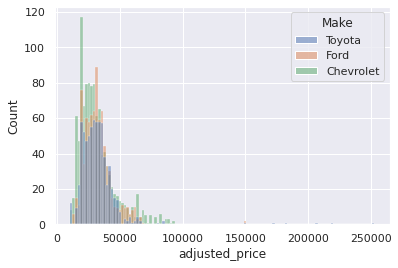

In [162]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
temp = df[df['Make'].isin(['Chevrolet','Ford','Toyota'])]
sns.histplot(temp, x = temp['adjusted_price'], hue = 'Make')

# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0.0, 100000.0)

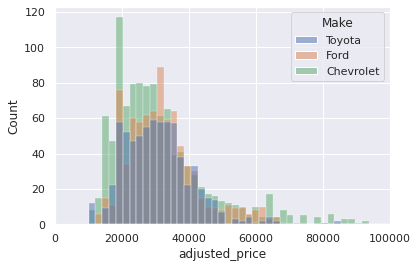

In [163]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
temp = df[df['Make'].isin(['Chevrolet','Ford','Toyota'])]
sns.histplot(temp, x = temp['adjusted_price'], hue = 'Make')
plt.xlim(0,100000)

# Plot the relationship between Engine HP and highway MPG

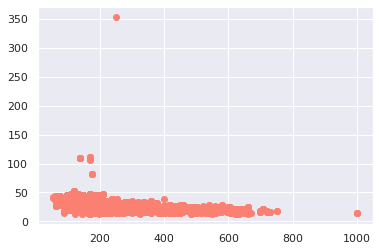

In [164]:
# Plot the relationship between Engine HP and highway MPG
plt.plot(df['Engine HP'],df['highway MPG'],'o', color = 'Salmon')

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

<AxesSubplot:xlabel='Engine HP'>

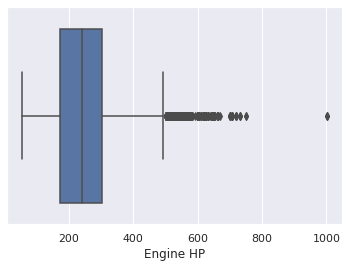

In [165]:
# create a boxplot for the 'Engine HP'
sns.boxplot(x = df['Engine HP'])

# Make another boxplot for highway MPG

<AxesSubplot:xlabel='highway MPG'>

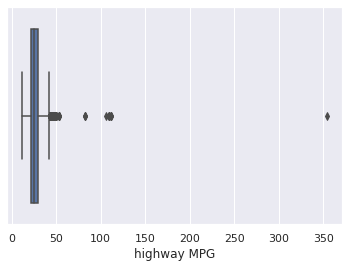

In [166]:
# create a boxplot for the 'highway MPG'
sns.boxplot(x = df['highway MPG'])

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [169]:
# Remove any  outliers from Engine HP and highway MPG 
Q1HP = df['Engine HP'].quantile(0.25)
Q3HP = df['Engine HP'].quantile(0.75)
IQRHP = Q3HP-Q1HP
outliers_below = df['Engine HP'] < (Q1HP - 1.5 * IQRHP)
outliers_above = df['Engine HP'] > (Q3HP + 1.5 * IQRHP)
df = df[ ~(outliers_above | outliers_below) ]

Q1MPG = df['highway MPG'].quantile(0.25)
Q3MPG = df['highway MPG'].quantile(0.75)
IQRMPG = Q3MPG-Q1MPG
outliersBelow = df['highway MPG'] < (Q3MPG - 1.5 * IQRMPG)
outlierAbove = df['highway MPG'] > (Q3MPG + 1.5 + IQRMPG)
df = df[ ~(outlierAbove | outliersBelow) ]

# Remake the boxplots for both Engine HP and highway MPG


<AxesSubplot:xlabel='Engine HP'>

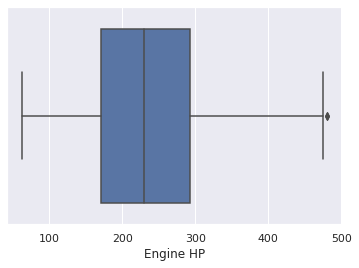

In [171]:
# Engine HP boxplot
sns.boxplot(x = df['Engine HP'])


<AxesSubplot:xlabel='highway MPG'>

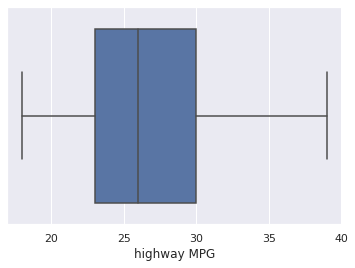

In [172]:
# highway MPG boxplot

sns.boxplot(x = df['highway MPG'])

# Make a scatter plot of Engine HP vs highway MPG

/home/physica/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

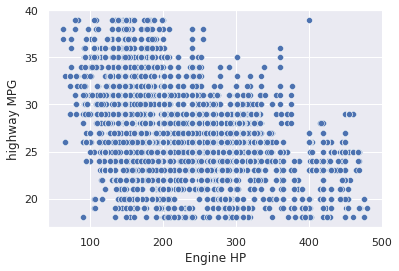

In [173]:
# Make a scatter plot of Engine HP vs highway MPG
sns.scatterplot(df['Engine HP'], df['highway MPG'])

# What does this plot tell you about how Engine HP affects highway MPG?

In [174]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('No, this graph shows that the two are independent of each other and there is no true correlation between the two.')

No, this graph shows that the two are independent of each other and there is no true correlation between the two.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

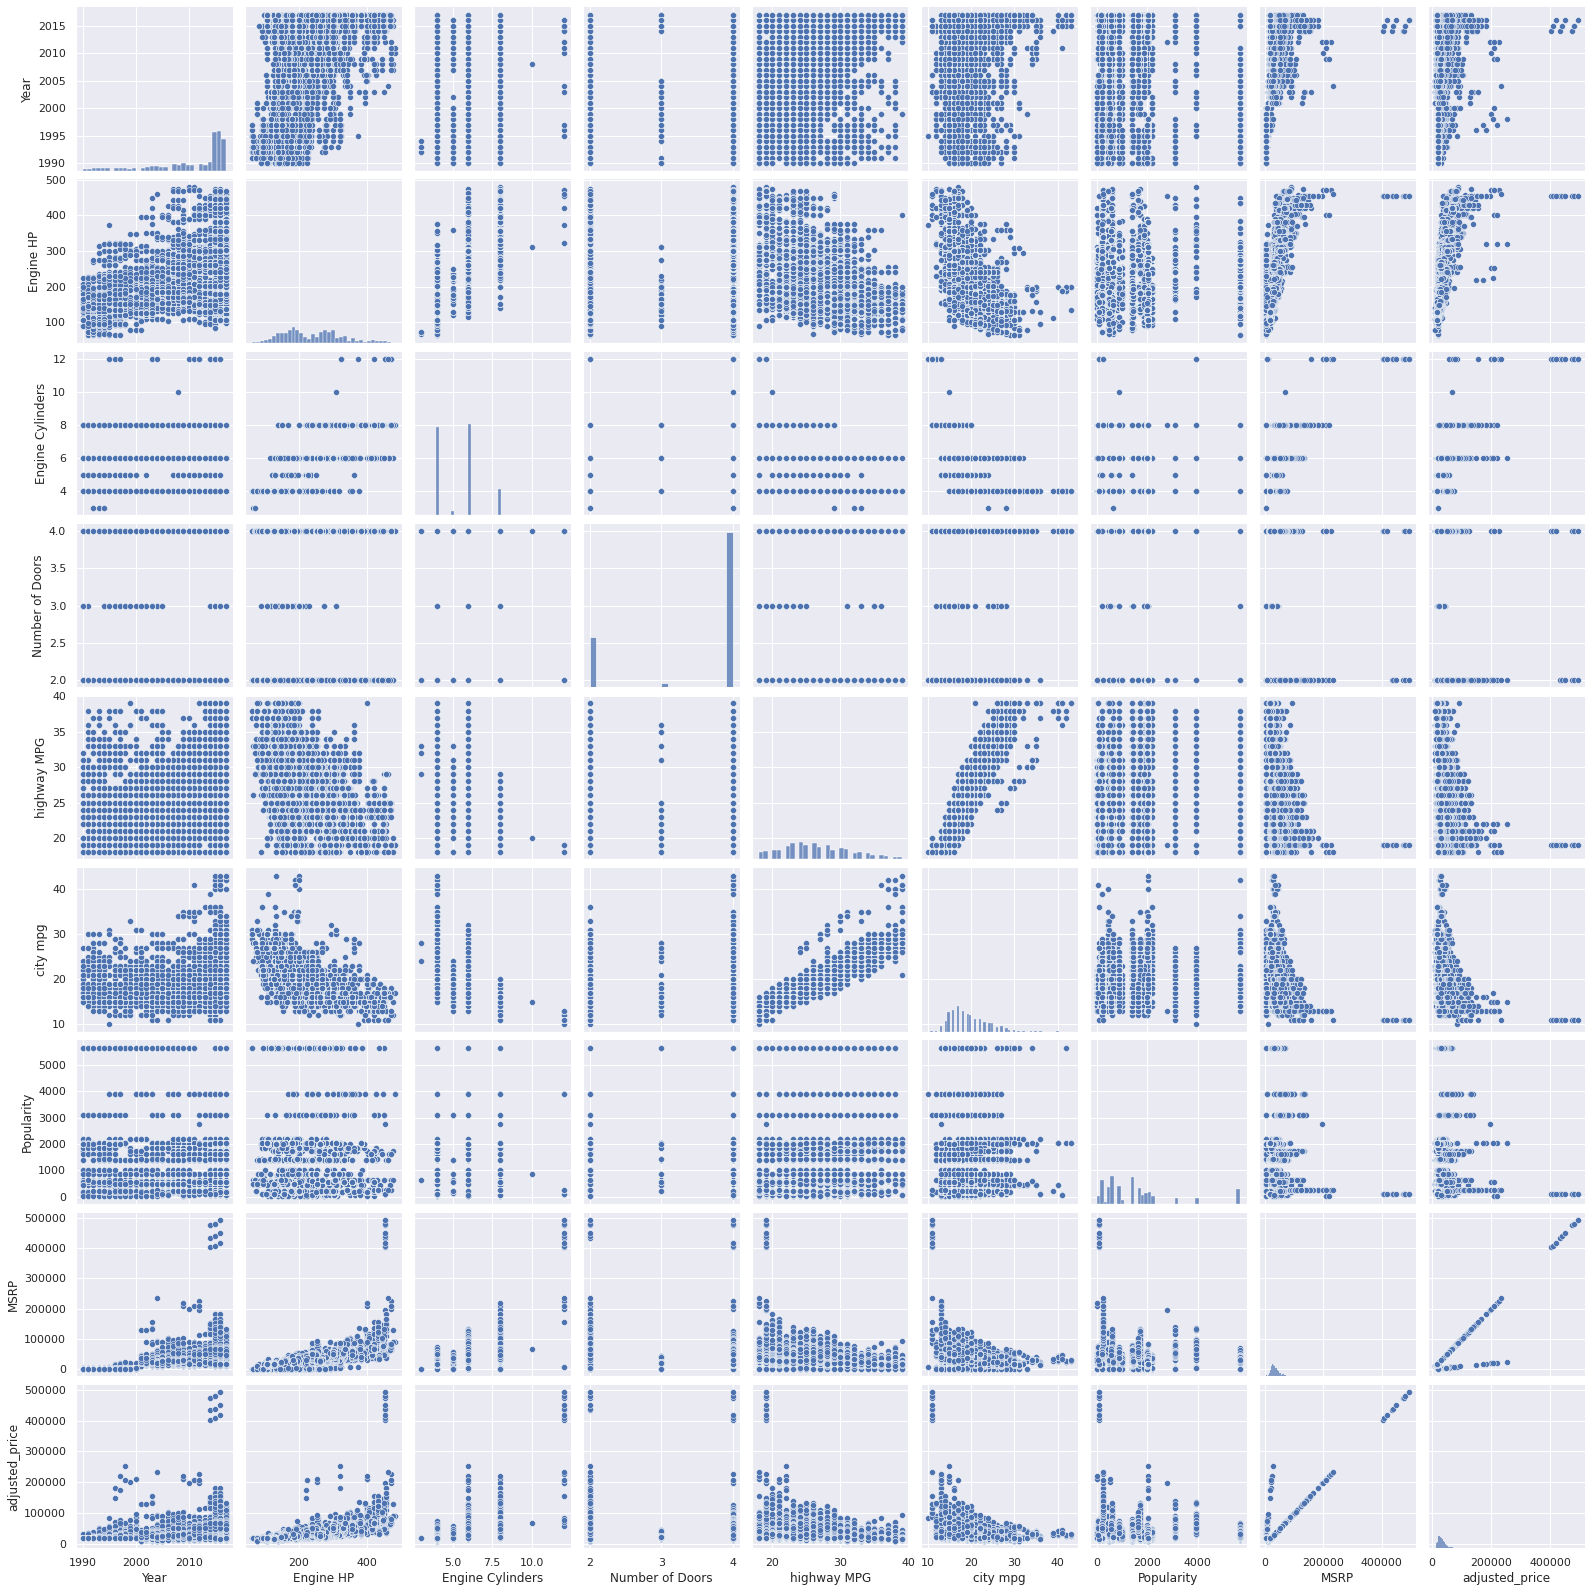

In [176]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df)

In [178]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print('Strongest Relationship: City MPG vs Highway MPG, \nWeak but Positive Relationships: Engine HP vs MSRP, Year vs Price, Year vs MSRP')

Strongest Relationship: City MPG vs Highway MPG, 
Weak but Positive Relationships: Engine HP vs MSRP, Year vs Price, Year vs MSRP


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

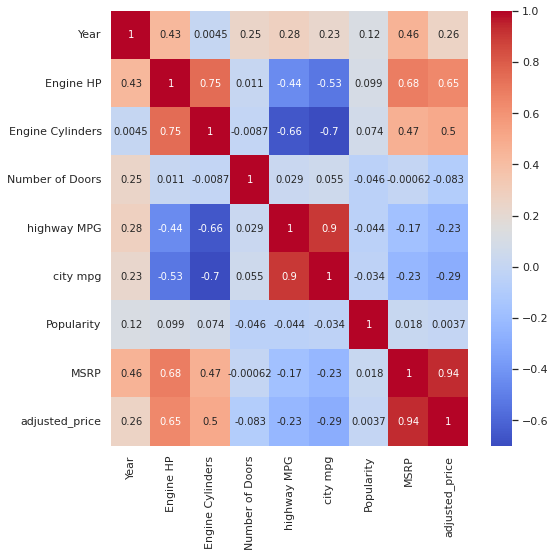

In [181]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

plt.figure(figsize = (8,8))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [182]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('With itsself, every data plotted against itsself is linear, it exists because the graphs are sorted in a matrix form so the diagonals are always 1.')

With itsself, every data plotted against itsself is linear, it exists because the graphs are sorted in a matrix form so the diagonals are always 1.


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [184]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
